# Проект: Принятие решений в бизнесе

Был проведен A/B-тест и получены результаты, которые сохранены в файлах. С помощью графиков кумулятивных характеристик и проведения статистических тестов необходимо проанализировать результаты А/В тестирования и сделать вывод о том, как введенные изменения повлияли на выручку интернет-магазина.

## Часть 1. Приоритизация гипотез.

Приоритизировать гипотезы, с целью увеличения выручки интернет-магазина.

### Описание данных

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
pd.set_option('display.max_colwidth', None) # настроить ширину колонки
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
try:
    data_hypo = pd.read_csv('/datasets/hypothesis.csv')
except:
    data_hypo = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
data_hypo.columns=data_hypo.columns.str.lower()
data_hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проверим данные таблицы на соответствие типам.

In [4]:
data_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Типы данных столбцов соответствуют содержимому.

### ICE для приоритизации гипотез

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»). По сути это отношение силы влияния предстоящего изменения к сложности его реализации, умноженное на поправочный коэффициент - увереность в том, что влияние и сложность оценены верно. 

In [5]:
data_hypo['ice'] = data_hypo.impact*data_hypo.confidence/data_hypo.efforts
data_hypo[['hypothesis','ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Приоретизация при помощи фреймворка ICE показала, что наиболее приоритетными являются гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения 16.2
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 13.3
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 11.2

Наименее приоритетна гипотеза об Изменении цвета фона главной страницы, чтобы увеличить вовлеченность пользователей.

### RICE для приоритизации гипотез

В отличии от ICE, для приоритезации гипотез фреймворк RICE использует дополнительный параметр Reach — то, скольких пользователей затронет вносимое изменение.

In [6]:
data_hypo['rice'] = data_hypo.reach*data_hypo.impact*data_hypo.confidence/data_hypo.efforts
data_hypo[['hypothesis','rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритетными гипотезами по фреймворку RICE стали:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	112.0
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	56.0
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 40.0
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	40.0

В аутсайдерах все так же предложение Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

### Как изменилась приоритизация гипотез при применении RICE вместо ICE

Различие в расчете этих двух характеристик - параметр охвата, суть размер аудитории, которую затронет предстоящее изменение. Поэтому все изменения в приоретизации гипотез связаны с разным охватом аудитории для этих гипотез.

Так, гипотезы о необходимости запуска акции на день рождения и новых каналах привлечения трафика значительно проигрывают в охвате гипотезе о добавлении формы подписки на каждую страницу. Такое изменение затронет всех пользователей, а не только именинников или новых пользователей из нового источника.

In [7]:
data_hypo[['hypothesis','ice','rice']].style.background_gradient(cmap ='OrRd')

,hypothesis,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


## Часть 2. Анализ A/B-теста

Запустим A/B-тест и проанализируем результаты. Доступны 2 датасета с такими данными:

### Описание данных

Датасет orders
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет visitors
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка данных

In [8]:
try:
    orders, visitors = (
        pd.read_csv('/datasets/orders.csv'), 
        pd.read_csv('/datasets/visitors.csv')  
    )
except:
    orders, visitors = (
        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    )

In [9]:
display(visitors.head())
display(orders.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Приведем типы данных в соответствие с содержимым.

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
display(visitors.info())
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

Пропусков данных нет, типы данных соответствуют содержимому.

#### Проверка на дубликаты

In [12]:
for dt in visitors, orders:
    print('Полных дубликатов в датасете:', dt.duplicated().sum())

Полных дубликатов в датасете: 0
Полных дубликатов в датасете: 0


Проверим, попали ли какие-то пользователи в обе группы.

In [13]:
AB_users = (
    orders.groupby(['visitorId']).agg({'group' : 'nunique', 'transactionId' : 'count', 'revenue' : 'sum'})
    .reset_index() 
)
dub_id = AB_users[AB_users.group != 1]["visitorId"].reset_index()

print(f'Пользователи, которые попали в обе группы : {dub_id["visitorId"].count()}')

Пользователи, которые попали в обе группы : 58


Нашлось 58 пользователей, которые во время теста одновременно находились в обеих группах. 

Наличие пользователей попавших в обе группы сильно влияет на результаты теста.

В visits у нас кумулятивные данные, дубликаты мы не сможем убрать. Но можно убрать только пересечение по покупкам в orders:  так как последующие расчеты будут только по заказам - средний чек, кумулятивная выручка. 

In [14]:
# создам датасет для расчета среднего чека, здесь не будет пользователей, попадающих в обе группы.
orders_nodub = orders.query('visitorId not in @dub_id.visitorId')
orders_nodub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


## Анализ A/B-теста:

### Выручка

Соберем таблицу из кумулятивных значений числа заказов, покупателей, выручки и посетителей по датам и с разбивкой на группы.

In [15]:

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум.
# Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.
ordersAggregated = ( 
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group'])) 

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

#Объединим обе таблицы в одну с понятными названиями столбцов: 

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group']))

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


По данным этой таблицы построим график

#### График кумулятивной выручки по группам

Изучим график кумулятивной выручки с разбивкой по группам. По ним можно определить, стоит останавливать тест или нет. 

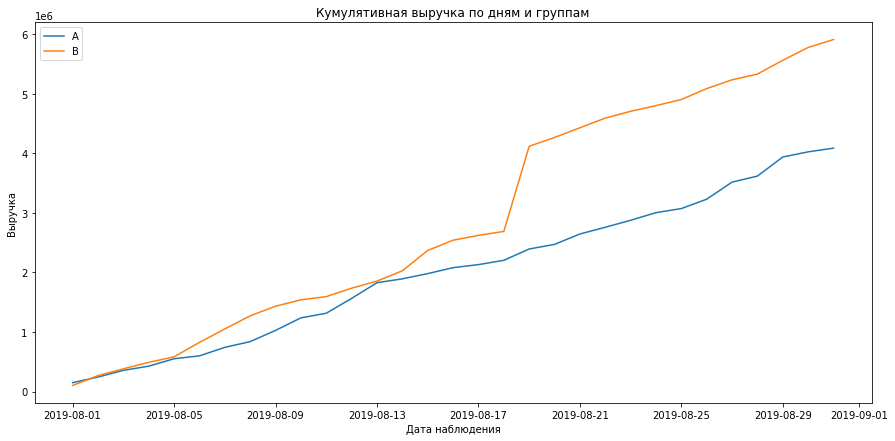

In [16]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивная выручка по дням и группам')
plt.legend(); 

Резкий скачок красной линии означает, что на характеристику влияют выбросы. Но по поведению графиков до выброса и общему наклону линий можно судить, что тест группы В стабильно лучше группы А.

Посмотрим то же самое на датасете без пересечения групп

In [17]:

# создаем массив уникальных пар значений дат и групп теста
datesGroups_nd = orders_nodub[['date','group']].drop_duplicates() 
display(datesGroups_nd)

# Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум.
# Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.
ordersAggregated_nd = ( 
    datesGroups_nd.apply(lambda x: orders_nodub[np.logical_and(orders_nodub['date'] <= x['date'], orders_nodub['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1)
    .sort_values(by=['date','group']))
ordersAggregated_nd.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
ordersAggregated_nd.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


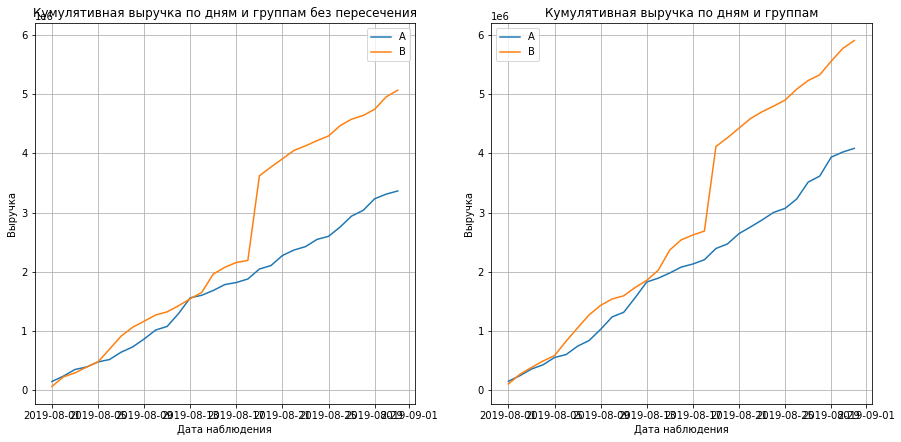

In [18]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_nd = ordersAggregated_nd[ordersAggregated_nd['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_nd = ordersAggregated_nd[ordersAggregated_nd['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA_nd['date'], cumulativeRevenueA_nd['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB_nd['date'], cumulativeRevenueB_nd['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивная выручка по дням и группам без пересечения')
plt.grid()
plt.legend()

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивная выручка по дням и группам')
plt.grid()
plt.legend(); 

Динамика схожая, график без пересечений показывает чуть меньшую выручку.

### Средний чек


#### График кумулятивного среднего чека по группам

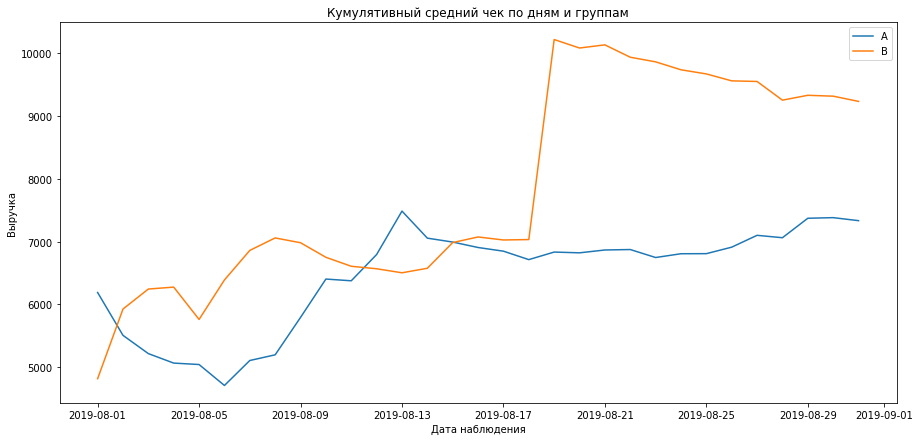

In [19]:
# разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивный средний чек по дням и группам')

plt.legend(); 

Средний чек группы А стабильно растет. Средний чек группы В имеет аномальный всплеск в середине области наблюдения, но дальнейший график идет на снижение. Можно предположить, что в отсутствие выброса график группы В не показывал бы превосходства над группой А.

#### График относительного изменения кумулятивного среднего чека группы B к группе A


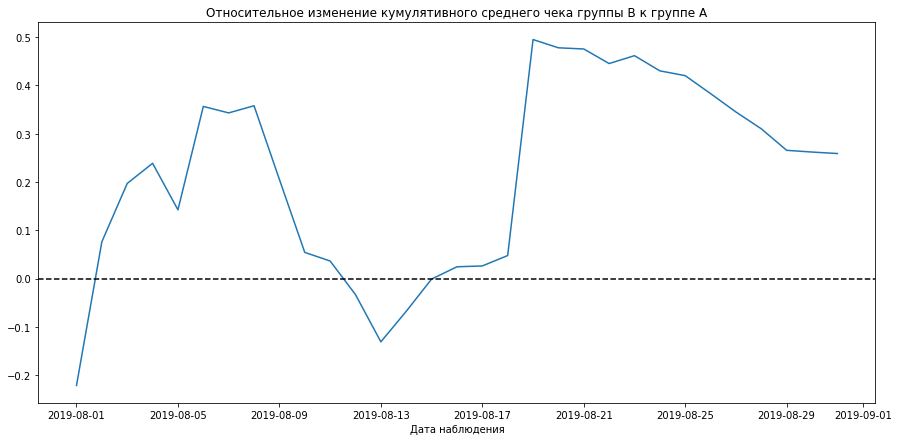

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков
plt.figure(figsize=(15, 7))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X

plt.xlabel('Дата наблюдения')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--'); 

График различия среднего чека говорит о том, что результаты группы B сейчас на 20% лучше группы А. Но на график сильно влияет выброс в середине августа. Если не учитывать его влияние, то можно заметить, что график обладает отрицательным трендом - после пика на выбросе значения среднего чека стремятся вниз.

И снова посмотрим на датасет без пересечения групп

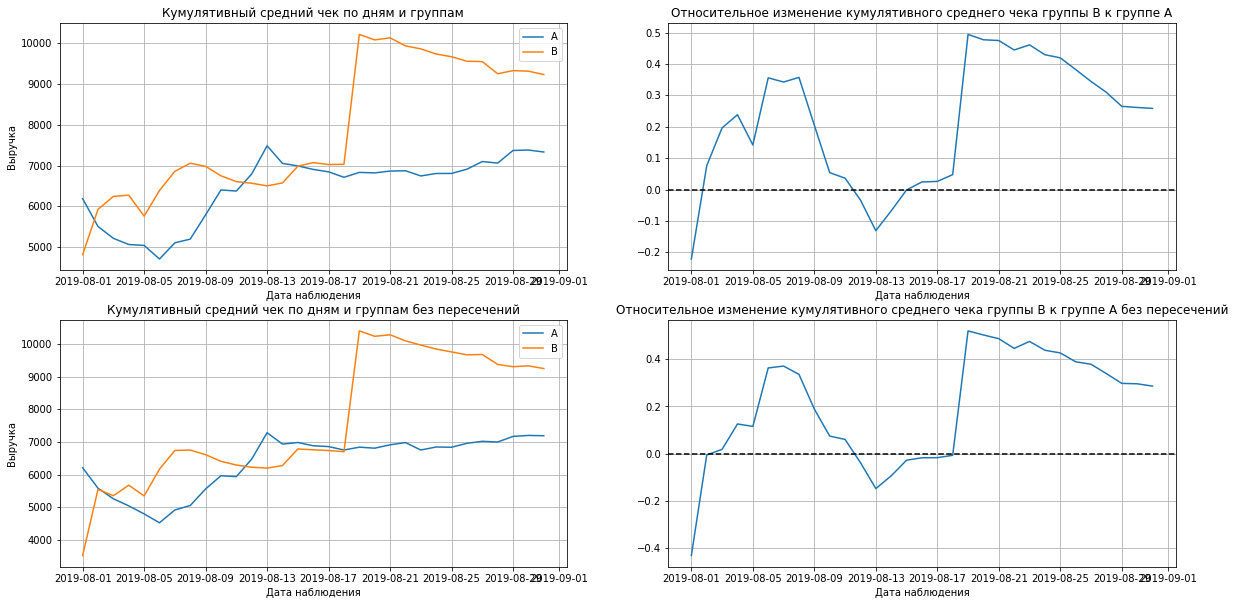

In [21]:
# разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2, 2, 1)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивный средний чек по дням и группам')
plt.grid()
plt.legend()

ax1 = plt.subplot(2, 2, 2)
# собираем данные в одном датафрейме
#mergedCumulativeRevenue = (
#    cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X

plt.xlabel('Дата наблюдения')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')

ax1 = plt.subplot(2, 2, 3)
plt.plot(cumulativeRevenueA_nd['date'], cumulativeRevenueA_nd['revenue']/cumulativeRevenueA_nd['orders'], label='A')
plt.plot(cumulativeRevenueB_nd['date'], cumulativeRevenueB_nd['revenue']/cumulativeRevenueB_nd['orders'], label='B')

plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Кумулятивный средний чек по дням и группам без пересечений')
plt.grid()
plt.legend()

ax1 = plt.subplot(2, 2, 4)
# собираем данные в одном датафрейме
mergedCumulativeRevenue_nd = (
    cumulativeRevenueA_nd.merge(cumulativeRevenueB_nd, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков

plt.plot(mergedCumulativeRevenue_nd['date'], (mergedCumulativeRevenue_nd['revenueB']/mergedCumulativeRevenue_nd['ordersB'])\
         /(mergedCumulativeRevenue_nd['revenueA']/mergedCumulativeRevenue_nd['ordersA'])-1)

# добавляем ось X

plt.xlabel('Дата наблюдения')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A без пересечений')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--');

Как оказалось, наличие пересечений пользователей в этом датасете не очень сильно влияет на рассчитанные кумулятивные характеристики. Заметно небольшое увеличение средней стоимости заказа, особенно в группе В.

#### График стоимостей заказов.


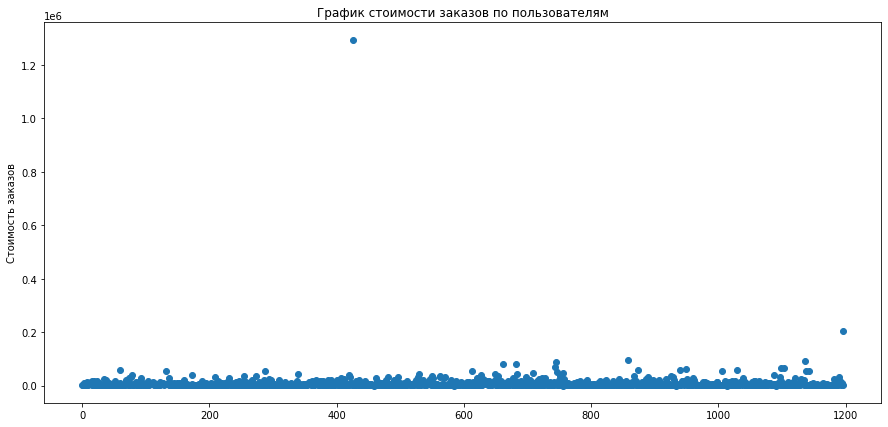

In [22]:
# серия из чисел от 0 до количества наблюдений в orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 7))
plt.ylabel('Стоимость заказов')
plt.title('График стоимости заказов по пользователям')
plt.scatter(x_values, orders['revenue']); 

Из-за аномального заказа более чем на 1 миллион рублей график сложно поддается анализу. Но даже так видно,  что стоимость заказов в основном не поднимается выше 30-40 тыс. рублей. От аномалий надо избавляться.

#### Выберем границу для определения аномальных заказов с помощью перцентилей.


In [23]:
perc_rev = np.percentile(orders['revenue'], [90, 95, 99])
perc_rev

array([18168. , 28000. , 58233.2])

Расчет перцентилей подтвердил предыдущее предположение. Не более 5% датасета это заказы стоимостью выше 28000, и не более 1% заказы дороже 58233.2.

### Количество заказов


#### График кумулятивного среднего количества заказов на посетителя по группам

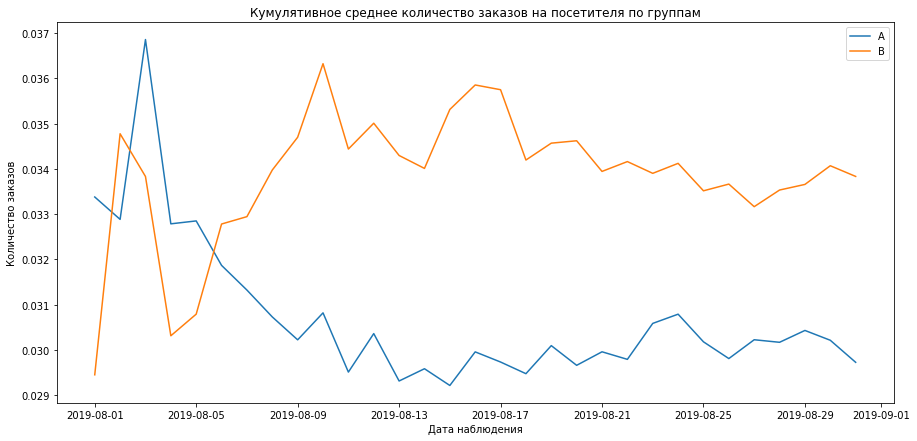

In [24]:
# датафреймы с кумулятивным количеством посетителей и заказов по дням в группах А и В
cumulativeOrderAvgA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
cumulativeOrderAvgB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]

plt.figure(figsize=(15, 7))

#разделим кумулятивное число заказов на кумулятивное количество посетителей
plt.plot(cumulativeOrderAvgA['date'], cumulativeOrderAvgA['orders']/cumulativeOrderAvgA['visitors'], label='A')
plt.plot(cumulativeOrderAvgB['date'], cumulativeOrderAvgB['orders']/cumulativeOrderAvgB['visitors'], label='B')

plt.xlabel('Дата наблюдения')
plt.ylabel('Количество заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')

plt.legend(); 

По этому графику можно однозначно сказать, что в ходе теста среднее число заказов от пользователей из группы В было стабильно больше, чем от группы А.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A


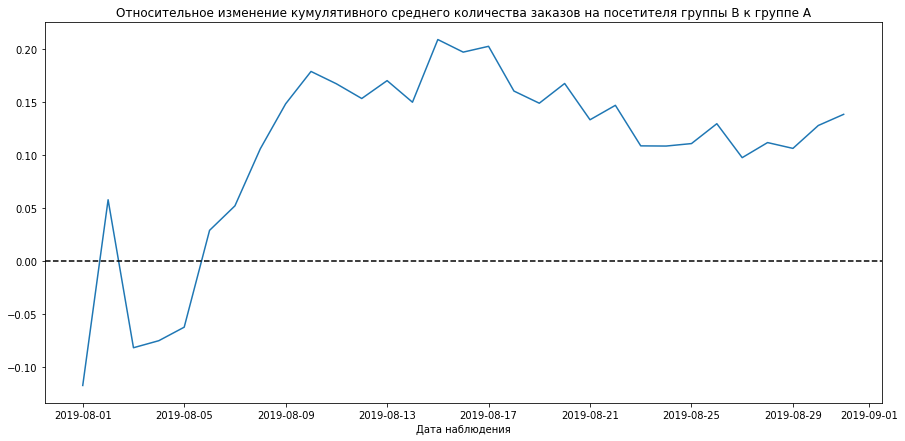

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeOrderAvg = (
    cumulativeOrderAvgA.merge(cumulativeOrderAvgB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков
plt.figure(figsize=(15, 7))

plt.plot(mergedCumulativeOrderAvg['date'], (mergedCumulativeOrderAvg['ordersB']/mergedCumulativeOrderAvg['visitorsB'])\
         /(mergedCumulativeOrderAvg['ordersA']/mergedCumulativeOrderAvg['visitorsA'])-1)

# добавляем ось X

plt.xlabel('Дата наблюдения')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--'); 

График различия среднего количества заказов между группами сообщает, что в целом результаты группы В значительно лучше группы A. Однако в последней трети графика заметно снижение числа заказов. Возможно, еще рано делать выводы о результатах теста.

#### График количества заказов по пользователям. 


,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


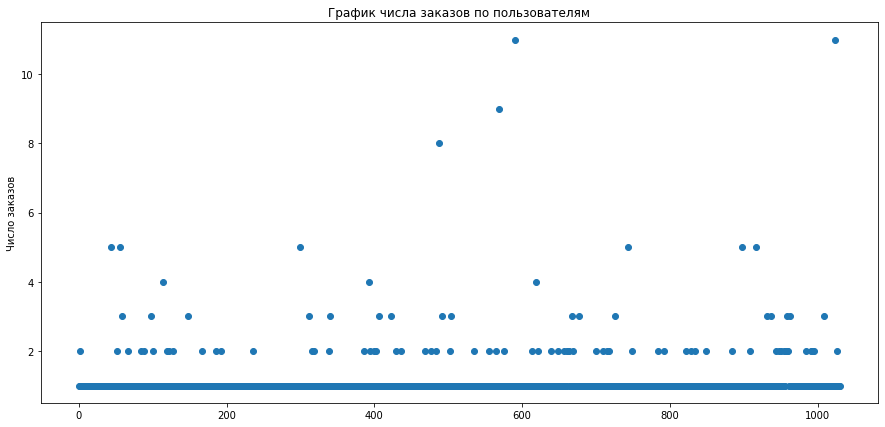

In [26]:
ordersByVisitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
    
)

ordersByVisitors.columns = ['visitorId', 'orders']
display(ordersByVisitors.sort_values(by='orders', ascending=False).head())
# серия из чисел от 0 до количества наблюдений в ordersByVisitors
x_values = pd.Series(range(0, len(ordersByVisitors)))

plt.figure(figsize=(15, 7))
plt.ylabel('Число заказов')
plt.title('График числа заказов по пользователям')
plt.scatter(x_values, ordersByVisitors['orders']);

По графику видно, что основная часть значений лежит в пределах 1-2 заказов на пользователя. Есть аномальные случаи в 4, 8 и более заказов, которые следует исключить из анализа.

#### Выберем границу для определения аномальных пользователей по числу заказов с помощью перцентилей.


In [27]:
perc_orders = np.percentile(ordersByVisitors['orders'], [90, 95, 99])
perc_orders

array([1., 2., 4.])

Расчет перцентилей показывает, что больше 2-х заказов совершают не более 5% пользователей, а больше 4-х - не более 1%.

### Статистические тесты

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным


Будем использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к.он более устойчив к выбросам. 

Сформулируем гипотезы и подготовим данные для расчетов.

- Н0: Нет различий в среднем количестве заказов между группами. 
- Н1: Есть различия в среднем между группами.

In [28]:
# количество посетителей по датам в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество посетителей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество посетителей по датам в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество посетителей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов и суммарная выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


# суммарное количество заказов и суммарная выручка до выбранной даты включительно в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество заказов и суммарная выручка в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарное количество заказов и суммарная выручка до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# собираем датасет
data_crude = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data_crude.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Датасет содержит ежеденевные и кумулятивные данные по числу заказов, выручке и количеству посетителей в разбитиении по подгруппам и состоит из следующих столбцов:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество посетителей в выбранную дату в группе A;
- visitorsPerDateB — количество посетителей в выбранную дату в группе B;
- visitorsCummulativeA — количество посетителей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество посетителей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [29]:
# Создадим переменные и укажем в них число совершённых заказов для заказывавших ранее посетителей.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

# в sampleA и sampleB пользователям из разных групп соответствует количество заказов.
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = (
    pd.concat([ordersByUsersA['orders'],pd
               .Series(0, index=np.arange(data_crude['visitorsPerDateA']
                                          .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],pd
               .Series(0, index=np.arange(data_crude['visitorsPerDateB']
                                          .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
)
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [30]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

print('Относительное различие', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.017
Относительное различие 0.138
Отвергаем нулевую гипотезу: разница статистически значима


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы А равен 13.8%, это статистически значимая разница.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным


- Н0: Нет различий в среднем чеке между группами. 
- Н1: Есть различия в среднем чеке между группами. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами.

In [31]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

print('Относительное различие', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
orders[orders['group']=='A']['revenue']

p-значение:  0.729
Относительное различие 0.259
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


2         400
7        1044
8       13710
10       4008
12       7370
        ...  
1187      750
1188      112
1193     3190
1194    10550
1195      100
Name: revenue, Length: 557, dtype: int64

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То, что средний чек группы B на 26% выше среднего чека группы A значит, что в данных присутствуют аномальные значения, которые сильно влияют на точечную оценку, но не на статистический тест. А также то, что наблюдаемое различие в 26% не является статистически значимым, в том числе потому, что критерий Мана-Уитни устойчив к выбросам.

Раз теcт показал, что нет стат значимой разницы между группами - то каково бы различие чека не было, оно не будет являться стат. значимым (у нас тут выбросы дают большое различие чеков, но их всего несколько и на общее различие среднего чека по группам они не влияют)

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным


Найденные в пунктах 3.2.4 и 3.3.4 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. А 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

Узнаем, сколько всего аномальных пользователей

In [32]:
# срез по числу заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc_orders[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc_orders[1]]['visitorId'],
    ],
    axis=0,
)
# срез по стоимости
usersWithExpensiveOrders = orders[orders['revenue'] > perc_rev[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display (abnormalUsers.head(5))
print(f'Всего {abnormalUsers.shape[0]} аномальных пользователя.') 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

Всего 74 аномальных пользователя.


Теперь подготовим выборки количества заказов по пользователям по группам теста:

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_crude['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_crude['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
ordersByUsersB

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


Применим статистический критерий Манна-Уитни к полученным выборкам.

- Н0: Нет различий в среднем количестве заказов между группами. 
- Н1: Есть различия в среднем между группами.

In [34]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

print('Относительное различие', "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.013
Относительное различие 0.173
Отвергаем нулевую гипотезу: разница статистически значима


Результаты по среднему количеству заказов практически не изменились. Все так же отвергаем нулевую гипотезу - различия в среднем между группами А и В в 17.3% являются статистически значимыми.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным


- Н0: Нет различий в среднем чеке между группами. 
- Н1: Есть различия в среднем чеке между группами. 

In [35]:
results = (st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )
          )

print('p-значение: ', "{0:.3f}".format(results.pvalue))

print('Относительное различие', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
     )

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

p-значение:  0.738
Относительное различие -0.020
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Стат.тест по очищенным данным показал примерно то же - мы не можем отвергнуть нулевую гипотезу. Но относительное различие значений по выборкам изменилось - с 26% в пользу группы В на 3% в пользу группы А, что не противоречит результатам стат.теста. Такое значение различия не является статистически значимым, как и 26% в пользу группы В.

### Вывод - Остановить тест, зафиксировать победу группы В.


- В целом графики отношений уже установились, и уже можно делать выводы по тесту. 
- График относительного различия для среднего чека обладает небольшим отрицательным трендом, особенно во второй половине графика. Это значит, что влияние теста для группы В на средний чек нулевое или отрицательное.
-  График относительного различия для среднего числа заказов на пользователя показывает рост числа заказов в среднем на 15% для группы В. 
- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по очищенным данным. Число заказов от пользователей группы В на 17.3% больше, чем у пользователей группы А;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым» (+26%), ни по данным после фильтрации аномалий(-3%). Проведенный тест значительно не повлиял на средний чек посетителя ни в одной из групп.

В тесте победила группа В - при неизменившемся среднем чеке на пользователя, выявлен рост числа заказов на 17.3% по сравнению с группой А.